# **PROGRAMMING FOR DATA SCIENCE: Final Project**

**Student:** Anna Bicelli <br> 
**ID:** VR509594

# **Part 1:** dataset import

brief explanation of the dataset, where I found it and waht i analyzes and what it contains
link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata


It reports the listing activity of homestays in New York City

**packages:**

In [328]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [329]:
# Load CSV file into DataFrame
airbnb_df = pd.read_csv('Airbnb_Open_Data.csv')


C:\Users\bicel\AppData\Local\Temp\ipykernel_15276\4082681128.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv('Airbnb_Open_Data.csv')


Since this dataset in column 25 has some mixted types values, I've to check them

In [330]:
airbnb_df.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [331]:
airbnb_df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,1001254,1002102,1002403,1002755,1003689,1004098,1004650,1005202,1005754,1006307,1006859,1007411,1007964,1008516,1009068
NAME,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East,BlissArtsSpace!,BlissArtsSpace!,Large Furnished Room Near B'way,Cozy Clean Guest Room - Family Apt,Cute & Cozy Lower East Side 1 bdrm,Beautiful 1br on Upper West Side,Central Manhattan/near Broadway,"Lovely Room 1, Garden, Best Area, Legal rental",Wonderful Guest Bedroom in Manhattan for SINGLES
host id,80014485718,52335172823,78829239556,85098326012,92037596077,45498551794,61300605564,90821839709,79384379533,75527839483,1280143094,18824631834,88136055909,26802410424,88920244552
host_identity_verified,unconfirmed,verified,NaN,unconfirmed,verified,verified,NaN,unconfirmed,verified,unconfirmed,verified,verified,verified,verified,verified
host name,Madaline,Jenna,Elise,Garry,Lyndon,Michelle,Alberta,Emma,Evelyn,Carl,Miranda,Alan,NaN,Darcy,Leonardo
neighbourhood group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Brooklyn,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,brookln,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill,Bedford-Stuyvesant,Bedford-Stuyvesant,Hell's Kitchen,Upper West Side,Chinatown,Upper West Side,Hell's Kitchen,South Slope,Upper West Side
lat,40.64749,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.68688,40.76489,40.80178,40.71344,40.80316,40.76076,40.66829,40.79826
long,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.95596,-73.98493,-73.96723,-73.99037,-73.96545,-73.98867,-73.98779,-73.96113
country,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States


In [332]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [333]:
airbnb_df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

to check which is the problematic column:

In [334]:
airbnb_df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

vedo che gli indici di colonna devono essere sistemati, lo farò in seguito, ora proseguo con la ricerca dei valori problematici che sono contenuti nella 25esima colonna

In [335]:
column25 = airbnb_df.columns[24]  # the first index is 0 so the 25th column has index 24
print(column25)

house_rules


the problematic columns has name `house_rules`

now I've to check her values to see what is the problem

In [336]:
print(f"percentage of house_rules NA value: \t\t\t{(airbnb_df['house_rules'].isna().sum() / len(airbnb_df)) * 100:.2f}%")

percentage of house_rules NA value: 			50.81%


In [337]:
airbnb_df.house_rules.value_counts()

house_rules
#NAME?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Since this dataset in column 25, that is the column house_rules, has the value #NAME? that is a different type from all other values in this column, I can choose one of this four options:
* set low_memory=False when importing the csv file<br>    airbnb_df = pd.read_csv('Airbnb_Open_Data.csv', low_memory=False)<br>    --> however if I ever need to use this column during EDA I may have problems
* replace the values #NAME? with null values NaN --><br>    airbnb_df=pd.read_csv('Airbnb_Open_Data.csv', na_values='#NAME?') <br>  or in this way <br>     airbnb_df=airbnb_df.replace('#NAME?', np.nan)<br>   --> I'll get more null values in the house_rules column
* since all the other values in this column are strings, I can turn all the values (strings,NaN and #NAME?) into strings <br>    airbnb_df.house_rules=airbnb.house_rules.astype(str)<br>     --> I'll not have more null values in the column
* drop the column house_rules because it is not is not relevant for this analysis<br>
airbnb_df.drop( column = ["house_rules"], inplace = True)

ELIMINO?

as you cann se there's the value **#HOUSE?** that is problematic, it can cause some problems during the analysis so I can **replace** these values with *NaN*:

In [338]:
airbnb_df=airbnb_df.replace('#NAME?', np.nan)

In [339]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102329 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102191 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

now i have more null values in the `house_rules` column obviuosly

In [340]:
airbnb_df.isnull().sum()

id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

I want to check that there are no more problematic values in the `house_rules` columns

In [341]:
airbnb_df.house_rules.value_counts()

house_rules
House Rules 1. Check-in is 4 pm local time. If the unit is ready earlier, we’ll let you know. Check-out is normally 11 am local time, but we’d be happy to extend it as long as we don’t have a cleaning scheduled. Just let us know.  2. All bookings require a security deposit of at least $300, which will be refunded within 7 days of your check-out. 3. For security measures we require all guests to provide proof of identification through ID verification on our own website. In order to check in we'll need a photo of your ID.  4. Our cancellation policy is as shown on our ad and defined by the site you are booking through.  5. Don’t let $300 go up in smoke. There's no smoking allowed in any Flatbook and a $300 fine for breaking this rule.  6. Unfortunately we don’t allow pets in any of our apartments. 7. Unless you’re staying in one of our specialty apartments, we don’t allow parties or excessive noise. 8. If we find the place very messy, we have to charge an extra $40 for every 

i don't have problematic values anymore and i can start my analysis.<br>As seen before, gli indici di colonna devono essere sistemati: 

In [342]:
airbnb_df.columns = airbnb_df.columns.map(lambda x: x.lower().replace(' ', '_'))

In [343]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [344]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102329 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102191 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [345]:
airbnb_df.shape

(102599, 26)

observing the size of the dataset it has 26 columns and 102599 rows, so I can see which variables have an eccessive number of NA values

In [346]:
print(sum(airbnb_df.isna().sum()))
print(airbnb_df.duplicated().sum())

193503
541


# Null values

to check in which columns I've more null values:

In [347]:
airbnb_df.isnull().sum()

id                                     0
name                                 270
host_id                                0
host_identity_verified               289
host_name                            408
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
minimum_nights                       409
number_of_reviews                    183
last_review                        15893
reviews_per_month                  15879
review_rate_number                   326
calculated_host_listings_count       319
availability_365                     448
house_rules     

le colonne price e service fee tolgo il dollar dign $ and the commas e le trasformo da object to float:

In [348]:
airbnb_df.price = airbnb_df.price.replace({'\$': '', ',': ''}, regex=True).astype(float)
airbnb_df.price

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 102599, dtype: float64

In [349]:
airbnb_df.service_fee = airbnb_df.service_fee.replace({'\$': '', ',': ''}, regex=True).astype(float)
airbnb_df.service_fee 


0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102594    169.0
102595    167.0
102596    198.0
102597    109.0
102598    206.0
Name: service_fee, Length: 102599, dtype: float64

In [350]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102329 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102191 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

these columns are of different types: **object**, **float**, **integer**, so I prefer to divide them in order to see better which columns contain float values, integers and objects

In [351]:
# Null values in columns of float type
null_float_columns = airbnb_df.select_dtypes(include=['float']).isnull().sum()
print("Null values in columns of float type:")
print(null_float_columns)

# Null values in columns of object type
null_text_columns = airbnb_df.select_dtypes(include=['object']).isnull().sum()
print("\nNull values in columns of object type:")
print(null_text_columns)

# Null values in columns of integer type
null_int_columns = airbnb_df.select_dtypes(include=['int']).isnull().sum()
print("\nNull values in columns of integer type:")
print(null_int_columns)

Null values in columns of float type:
lat                                   8
long                                  8
construction_year                   214
price                               247
service_fee                         273
minimum_nights                      409
number_of_reviews                   183
reviews_per_month                 15879
review_rate_number                  326
calculated_host_listings_count      319
availability_365                    448
dtype: int64

Null values in columns of object type:
name                         270
host_identity_verified       289
host_name                    408
neighbourhood_group           29
neighbourhood                 16
country                      532
country_code                 131
instant_bookable             105
cancellation_policy           76
room_type                      0
last_review                15893
house_rules                54843
license                   102597
dtype: int64

Null values in columns of 

In [352]:
#for float variables
print("Percentage of null values in columns of float type:")
print(f"percentage of lat NA value: \t\t\t\t\t\t{(airbnb_df['lat'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of long NA value: \t\t\t\t\t\t{(airbnb_df['long'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of price NA value:\t\t\t\t {(airbnb_df['price'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of service_fee NA value:\t\t\t {(airbnb_df['service_fee'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of construction_year NA value: \t\t\t\t{(airbnb_df['construction_year'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of minimum_nights NA value: \t\t\t\t\t{(airbnb_df['minimum_nights'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of number_of_reviews NA value: \t\t\t\t{(airbnb_df['number_of_reviews'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of reviews_per_month NA value: \t\t\t\t{(airbnb_df['reviews_per_month'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of review_rate_number NA value: \t\t\t\t{(airbnb_df['review_rate_number'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of calculated_host_listings_count NA value: \t\t\t{(airbnb_df['calculated_host_listings_count'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of availability_365 NA value: \t\t\t\t{(airbnb_df['availability_365'].isna().sum()/len(airbnb_df))*100:.2f}%")

Percentage of null values in columns of float type:
percentage of lat NA value: 						0.01%
percentage of long NA value: 						0.01%
percentage of price NA value:				 0.24%
percentage of service_fee NA value:			 0.27%
percentage of construction_year NA value: 				0.21%
percentage of minimum_nights NA value: 					0.40%
percentage of number_of_reviews NA value: 				0.18%
percentage of reviews_per_month NA value: 				15.48%
percentage of review_rate_number NA value: 				0.32%
percentage of calculated_host_listings_count NA value: 			0.31%
percentage of availability_365 NA value: 				0.44%


Based on these information the null values related to *float* data can be **replaced** with their **mean value** because the percentage are aroud? 0.<br>
**Remove** the variable `reviews_per_month`,  from the variable itself. The percentage of null values is excessive and would not lead to useful information for the entire population of the dataset.<br>
**Drop** the NaN values in the columns `price` and `service_fee`.

In [353]:
lat_mean = airbnb_df['lat'].mean()
airbnb_df['lat'].fillna(lat_mean, inplace=True)

long_mean = airbnb_df['long'].mean()
airbnb_df['long'].fillna(long_mean, inplace=True)

construction_year_mean = airbnb_df['construction_year'].mean()
airbnb_df['construction_year'].fillna(construction_year_mean, inplace=True)

minimum_nights_mean = airbnb_df['minimum_nights'].mean()
airbnb_df['minimum_nights'].fillna(minimum_nights_mean, inplace=True)

number_of_reviews_mean = airbnb_df['number_of_reviews'].mean()
airbnb_df['number_of_reviews'].fillna(number_of_reviews_mean, inplace=True)

review_rate_number_mean = airbnb_df['review_rate_number'].mean()
airbnb_df['review_rate_number'].fillna(review_rate_number_mean, inplace=True)

calculated_host_listings_count_mean = airbnb_df['calculated_host_listings_count'].mean()
airbnb_df['calculated_host_listings_count'].fillna(calculated_host_listings_count_mean, inplace=True)

availability_365_mean = airbnb_df['availability_365'].mean()
airbnb_df['availability_365'].fillna(availability_365_mean, inplace=True)

In [354]:
airbnb_df.drop(columns = [ "reviews_per_month"], axis=1, inplace = True)

In [355]:
airbnb_df.dropna(subset=['price'],inplace=True)
airbnb_df.dropna(subset=['service_fee'],inplace=True)


In [356]:
airbnb_df.isnull().sum()

id                                     0
name                                 267
host_id                                0
host_identity_verified               284
host_name                            403
neighbourhood_group                   28
neighbourhood                         15
lat                                    0
long                                   0
country                              527
country_code                         122
instant_bookable                      96
cancellation_policy                   71
room_type                              0
construction_year                      0
price                                  0
service_fee                            0
minimum_nights                         0
number_of_reviews                      0
last_review                        15843
review_rate_number                     0
calculated_host_listings_count         0
availability_365                       0
house_rules                        54551
license         

In [357]:
# for object type
print("Percentage of null values in columns of text or object type:")
print(f"\npercentage of name NA value: \t\t\t\t{(airbnb_df['name'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of host_identity_verified NA value:\t\t {(airbnb_df['host_identity_verified'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of host_name NA value:\t\t\t {(airbnb_df['host_name'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of neighbourhood_group NA value:\t\t {(airbnb_df['neighbourhood_group'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of neighbourhood NA value: \t\t\t{(airbnb_df['neighbourhood'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of country NA value:\t\t\t\t {(airbnb_df['country'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of country_code NA value: \t\t\t{(airbnb_df['country_code'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of instant_bookable NA value:\t\t {(airbnb_df['instant_bookable'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of cancellation_policy NA value:\t\t{(airbnb_df['cancellation_policy'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of last_review NA value: \t\t\t{(airbnb_df['last_review'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of house_rules NA value: \t\t\t{(airbnb_df['house_rules'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of license NA value: \t\t\t{(airbnb_df['license'].isna().sum() / len(airbnb_df)) * 100:.3f}%")

Percentage of null values in columns of text or object type:

percentage of name NA value: 				0.26%
percentage of host_identity_verified NA value:		 0.28%
percentage of host_name NA value:			 0.39%
percentage of neighbourhood_group NA value:		 0.03%
percentage of neighbourhood NA value: 			0.01%
percentage of country NA value:				 0.52%
percentage of country_code NA value: 			0.12%
percentage of instant_bookable NA value:		 0.09%
percentage of cancellation_policy NA value:		0.07%
percentage of last_review NA value: 			15.52%
percentage of house_rules NA value: 			53.42%
percentage of license NA value: 			99.998%


The percentage of null values in the `last_review`, `house_rules` (as seen before) and `license` variables is excessive and would not lead to useful information so I can **drop** these columns.
<br>The `house_rules` column è quella in cui erano presenti valori problematici che ho sostituito con valori nulli, essendo nulli più della metà dei valori di questa variabile, significa che posso eliminare la colonna.

In [358]:
airbnb_df.drop(columns = ["license","house_rules", "last_review"], axis=1, inplace = True)

In [359]:
airbnb_df.shape

(102113, 22)

Vedo che le dimensioni del dataframe si sono ridotte dopo aver eliminato le quattro colonne indesiderate.<br>
The null values related to *object* variables can be replaced with the **mode** that is the value that occurs the most in the variable, so it doesn't change the distribution a lot

In [360]:
name_mode = airbnb_df['name'].mode()[0]
airbnb_df['name'].fillna(name_mode, inplace=True)

host_identity_verified_mode = airbnb_df['host_identity_verified'].mode()[0]
airbnb_df['host_identity_verified'].fillna(host_identity_verified_mode, inplace=True)

host_name_mode = airbnb_df['host_name'].mode()[0]
airbnb_df['host_name'].fillna(host_name_mode, inplace=True)

neighbourhood_group_mode = airbnb_df['neighbourhood_group'].mode()[0]
airbnb_df['neighbourhood_group'].fillna(neighbourhood_group_mode, inplace=True)

neighbourhood_mode = airbnb_df['neighbourhood'].mode()[0]
airbnb_df['neighbourhood'].fillna(neighbourhood_mode, inplace=True)

country_mode = airbnb_df['country'].mode()[0]
airbnb_df['country'].fillna(country_mode, inplace=True)

country_code_mode = airbnb_df['country_code'].mode()[0]
airbnb_df['country_code'].fillna(country_code_mode, inplace=True)

instant_bookable_mode = airbnb_df['instant_bookable'].mode()[0]
airbnb_df['instant_bookable'].fillna(instant_bookable_mode, inplace=True)

cancellation_policy_mode = airbnb_df['cancellation_policy'].mode()[0]
airbnb_df['cancellation_policy'].fillna(cancellation_policy_mode, inplace=True)

room_type_mode = airbnb_df['room_type'].mode()[0]
airbnb_df['room_type'].fillna(room_type_mode, inplace=True)

Now I check againg for NA values as I did before

In [361]:
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country_code                      0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now that all the null values are settled i can proceed with the understanding of the values in the dataset, finding correlations between them. 

# Analysis of the values

At this point I want to understand how the data are distributed within the main variables in order to find the most significant variables and some interesting aspects to analyze later.

GUARDO SE CI SONO OUTLIERS

controllo un po i valori delle variabili che mi possono interessare in seguito

In [362]:
airbnb_df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        43613
Brooklyn         41648
Queens           13201
Bronx             2700
Staten Island      950
brookln              1
Name: count, dtype: int64

I can see that brookln corrisponde a Brooklyn quindi voglio unire quei valori e anche manhattan con Manhattan

In [363]:
#ELIMINAAA
value_to_find='brookln'
index_row = (airbnb_df == value_to_find).any(axis=1).idxmax()
print("The value", value_to_find, "is in the row with index:", index_row)
value2_to_find='manhatan'
index2_row = (airbnb_df == value2_to_find).any(axis=1).idxmax()
print("The value", value2_to_find, "is in the row with index:", index2_row)


The value brookln is in the row with index: 13
The value manhatan is in the row with index: 0


lo modifico:

In [364]:
#ELIMINAAAA
#airbnb_df['neighbourhood_group'][13] = 'Brooklyn'
#airbnb_df['neighbourhood_group'][18] = 'Manhattan'

CANCELLO LE PARTI PRIMA PERCHE non ha funzioanto perche se faccio l'histogramma di neighbourhood_group mi escono le colonne brokln e manhatan quindi meglio fare:

In [406]:
airbnb_df["neighbourhood_group"] = airbnb_df["neighbourhood_group"].replace({"brookln": "Brooklyn"})
airbnb_df["neighbourhood_group"] = airbnb_df["neighbourhood_group"].replace({"manhatan": "Manhattan"})

In [367]:
airbnb_df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        43613
Brooklyn         41649
Queens           13201
Bronx             2700
Staten Island      950
Name: count, dtype: int64

In [368]:
airbnb_df.neighbourhood.value_counts()

neighbourhood
Bedford-Stuyvesant        7914
Williamsburg              7740
Harlem                    5442
Bushwick                  4953
Hell's Kitchen            3955
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: count, Length: 224, dtype: int64

In [369]:
airbnb_df.country.value_counts()

country
United States    102113
Name: count, dtype: int64

Ovviamnete, siccome si tratta di un dataset riguardante gli airbnb di new york tutti si trovano negli stati uniti

In [370]:
airbnb_df.room_type.value_counts()

room_type
Entire home/apt    53454
Private room       46330
Shared room         2215
Hotel room           114
Name: count, dtype: int64

POTREI FARE QUALCOSA CON QUESTE TIPOLOGIE DI CAMERE

In [371]:
airbnb_df.construction_year.value_counts()

construction_year
2014.000000    5213
2008.000000    5200
2006.000000    5196
2019.000000    5174
2009.000000    5144
2020.000000    5136
2010.000000    5135
2005.000000    5116
2022.000000    5112
2012.000000    5105
2003.000000    5097
2007.000000    5086
2015.000000    5074
2017.000000    5042
2011.000000    5041
2018.000000    5030
2021.000000    5015
2004.000000    5010
2013.000000    4993
2016.000000    4990
2012.487464     204
Name: count, dtype: int64

In [372]:
airbnb_df.construction_year.dtype

dtype('float64')

In [373]:
airbnb_df.construction_year = airbnb_df.construction_year.astype(int)

In [374]:
airbnb_df.construction_year.value_counts()

construction_year
2012    5309
2014    5213
2008    5200
2006    5196
2019    5174
2009    5144
2020    5136
2010    5135
2005    5116
2022    5112
2003    5097
2007    5086
2015    5074
2017    5042
2011    5041
2018    5030
2021    5015
2004    5010
2013    4993
2016    4990
Name: count, dtype: int64

ho convertito da float a interi i valori riguardanti la variabile construction_year 

Prima di tutto vorrei trasformare i valori della colonna contrsuction_year in interi e non float e poi potrei studiare tipo quale anno sono stati costrutiti piu airbnbn appartamenti e vedere che effettivmaente si va sempre in crescendo man mano che passano gli anni vengono costruiti sempre piu appartamenti che poi si affidano alla piattFORMA AIRBNB PER ospitare

In [375]:
airbnb_df.minimum_nights.value_counts()

minimum_nights
 1.0      25316
 2.0      23509
 3.0      16048
 30.0     11567
 4.0       6602
          ...  
-3.0          1
 273.0        1
 175.0        1
 98.0         1
 825.0        1
Name: count, Length: 154, dtype: int64

probabilmente in questa colonna ci sono outliers perche non è possibile che il numero minimo di notti in cui si puo alloggiare sia negativo e altri valori invece sembrano troppo grandi STUDIO OUTLIERS
indetificare gli outliers helps us find potential mistakes in the dataset 

In [376]:
#to study the outliers: calculate mean and standard deviation
mean_minimum_nights = airbnb_df.minimum_nights.mean()
std_minimum_nights = airbnb_df.minimum_nights.std()

#calculate upper and lower bound
upper_bound = mean_minimum_nights+2*std_minimum_nights
lower_bound = mean_minimum_nights-2*std_minimum_nights

#display outliers using boolean masks
outliers = airbnb_df[airbnb_df['minimum_nights']>upper_bound]
outliers = airbnb_df[airbnb_df['minimum_nights']<lower_bound]
print(outliers)



             id                                               name  \
42446  24444262            Cozy room in bright, spacious apartment   
42500  24474086  2bd BOUTIQUE  Apartament in the heart of MANHA...   
42538  24495073                   Newly Renovated Garden Apartment   
69749  39523709                Amazing location! 10ft from L train   

           host_id host_identity_verified           host_name  \
42446  84040511136               verified              Steven   
42500   2679070022            unconfirmed                 Tom   
42538  98469733112               verified              Margie   
69749  62132542936               verified  Giorgia & Benjamin   

      neighbourhood_group       neighbourhood       lat      long  \
42446               Bronx         Hunts Point  40.81731 -73.89052   
42500           Manhattan      Hell's Kitchen  40.76694 -73.98773   
42538            Brooklyn  Bedford-Stuyvesant  40.68470 -73.94350   
69749            Brooklyn        Williamsburg  

Questa parte degli outliers è abbatsanza inutile, perche ho analizzato i valori negativi in u altro modo.

GUARDA CHE VALORI HANNO IL MINIMO NOTTI IN QUESTI E CONTORLLA COME SI FA

In [377]:
#DA ELIMINAREEEEE
airbnb_df['minimum_nights'][42500]

-365.0

In [378]:
#DA ELIMINAREEEEEEEE
alue_to_find=-3.0
indexx_row = (airbnb_df == alue_to_find).any(axis=1).idxmax()
print("The value", alue_to_find, "is in the row with index:", indexx_row)

The value -3.0 is in the row with index: 525


In [379]:
airbnb_df[airbnb_df['minimum_nights']<0].head(5)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
176,1098541,BROOKLYN VICTORIAN STYLE SUITE.....,83631499592,unconfirmed,Frederick,Brooklyn,Fort Greene,40.69098,-73.97113,United States,...,flexible,Private room,2008,1155.0,231.0,-10.0,213.0,5.0,2.0,19.0
352,1195746,"Beautiful, Bright’s, Warm & Spacious 1.5BR Apt",2227683633,unconfirmed,Grant,Brooklyn,Crown Heights,40.67174,-73.95663,United States,...,moderate,Entire home/apt,2009,73.0,15.0,-5.0,104.0,5.0,1.0,31.0
398,1221151,SUPER BIG AND COZY PRIVATE BEDROOM,50336791874,verified,Tucker,Brooklyn,Kensington,40.64302,-73.97255,United States,...,flexible,Private room,2015,779.0,156.0,-1.0,82.0,2.0,2.0,131.0
421,1233854,Charming Nolita Apartment!!,7389895192,verified,Belinda,Manhattan,Nolita,40.72094,-73.99706,United States,...,flexible,Entire home/apt,2008,874.0,175.0,-10.0,68.0,5.0,1.0,13.0
441,1244900,Cozy apartment in a brownstone,81186886194,verified,Adelaide,Manhattan,Harlem,40.80497,-73.95016,United States,...,moderate,Entire home/apt,2021,920.0,184.0,-12.0,203.0,5.0,3.0,77.0


questi valori indicano inconsistenza nei dati e devo rimuovere queste righe oppure rimpiazzare le celle negative with 0

OPTO PER METTERE 0

In [380]:
# Seleziona le righe con 'minimum_nights' negativo e assegna loro il valore 0 nella colonna minimum_night
airbnb_df.loc[airbnb_df['minimum_nights'] < 0, 'minimum_nights'] = 0

In [381]:
airbnb_df.minimum_nights.value_counts()

minimum_nights
1.0      25316
2.0      23509
3.0      16048
30.0     11567
4.0       6602
         ...  
323.0        1
131.0        1
175.0        1
98.0         1
825.0        1
Name: count, Length: 145, dtype: int64

In [382]:
airbnb_df[airbnb_df['minimum_nights']<0]

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365


vedo che ora non ho più inconsistenza nella varibaile minimum_night

In [383]:
airbnb_df.number_of_reviews.value_counts()

number_of_reviews
0.0      15684
1.0      10331
2.0       7129
3.0       5350
4.0       4136
         ...  
567.0        1
592.0        1
797.0        1
966.0        1
300.0        1
Name: count, Length: 477, dtype: int64

In [384]:
airbnb_df.review_rate_number.value_counts()

review_rate_number
5.000000    23257
4.000000    23212
3.000000    23167
2.000000    22989
1.000000     9162
3.279106      326
Name: count, dtype: int64

questo è interessante sicuro posso utilizzarlo in seguito

In [385]:
airbnb_df.calculated_host_listings_count.value_counts()

calculated_host_listings_count
1.0     63137
2.0     14390
3.0      6546
4.0      3539
5.0      1986
        ...  
22.0       20
86.0       20
55.0       15
46.0        9
80.0        7
Name: count, Length: 79, dtype: int64

63429 hosts hanno 1 listing mentre 7 hosts hanno 80 listing

ORA CORRELAZIONE TRA VARIABILI

In [386]:
airbnb_df_corr = airbnb_df.corr(numeric_only=True)
airbnb_df_corr

,id,host_id,lat,long,instant_bookable,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
id,1.000000,-0.000339,-0.009009,0.042449,0.005671,0.001239,0.007009,0.007009,0.005288,-0.040946,0.036271,0.023724,-0.138228
host_id,-0.000339,1.000000,0.000759,-0.008746,0.003669,0.004645,0.003558,0.003539,-0.001632,-0.004414,0.003512,0.001709,-0.002488
lat,-0.009009,0.000759,1.000000,0.073994,0.000700,0.005658,-0.005751,-0.005728,0.015673,-0.025283,-0.003742,0.032503,-0.005010
long,0.042449,-0.008746,0.073994,1.000000,-0.004377,0.000821,0.003206,0.003201,-0.039280,0.069097,0.015310,-0.104766,0.058499
instant_bookable,0.005671,0.003669,0.000700,-0.004377,1.000000,0.002242,0.000468,0.000468,-0.002572,0.000504,0.002735,-0.000281,-0.004517
construction_year,0.001239,0.004645,0.005658,0.000821,0.002242,1.000000,-0.003689,-0.003668,-0.000842,0.001684,0.005160,-0.002731,-0.008803
price,0.007009,0.003558,-0.005751,0.003206,0.000468,-0.003689,1.000000,0.999991,-0.002984,0.005192,-0.004383,-0.000201,-0.003046
service_fee,0.007009,0.003539,-0.005728,0.003201,0.000468,-0.003668,0.999991,1.000000,-0.002967,0.005169,-0.004385,-0.000194,-0.003039
minimum_nights,0.005288,-0.001632,0.015673,-0.039280,-0.002572,-0.000842,-0.002984,-0.002967,1.000000,-0.050122,-0.002878,0.084848,0.060405
number_of_reviews,-0.040946,-0.004414,-0.025283,0.069097,0.000504,0.001684,0.005192,0.005169,-0.050122,1.000000,-0.018033,-0.080601,0.098668


<function matplotlib.pyplot.show(close=None, block=None)>

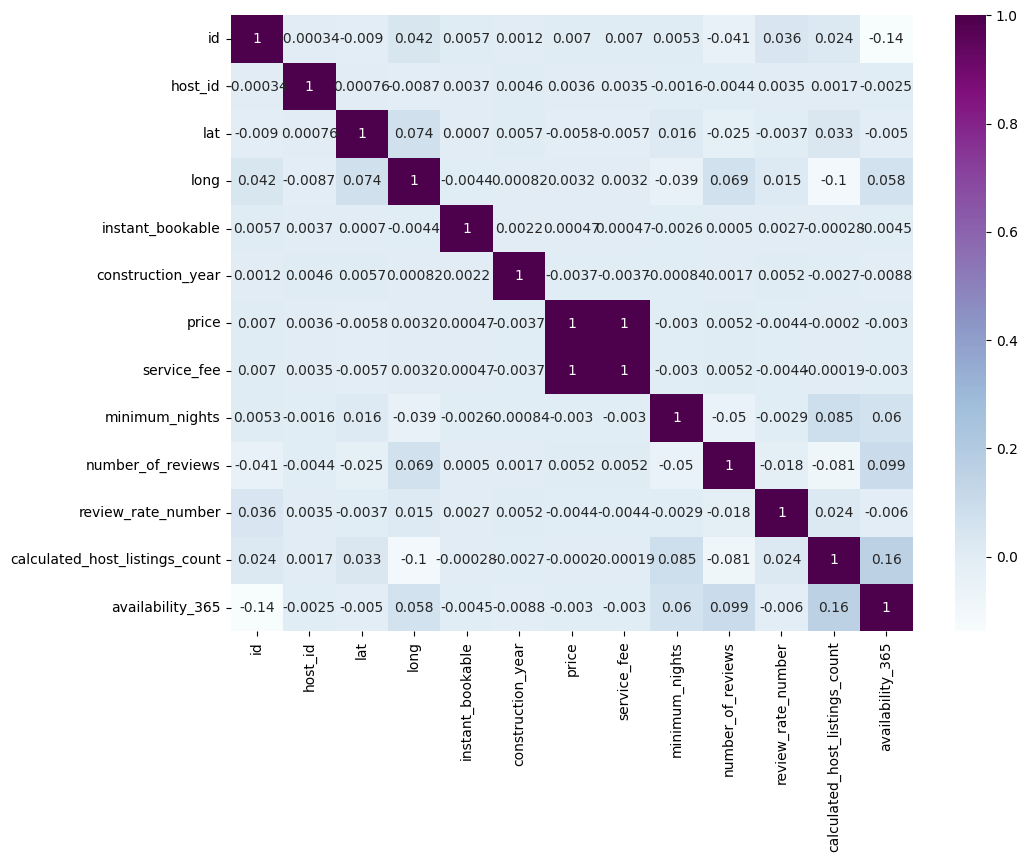

In [413]:
plt.figure(figsize=(11,8))
sns.heatmap(airbnb_df_corr, annot=True, cmap="BuPu")
plt.show

vedo che sono scorrelate le varibaili numeriche tra loro

SCATTER PLOT useful to visualize the relatioship between two continuous variables and I can use the Seaborn's scatterplot() function to create them.

per le vairbaili categoriche (object) posso usare scatterplots per studiare la distribuzione dele varibaili e osservarne la correlazione graficamente con quelle numeriche  piu interessanti

tipo construction year vs host id e vedere per lat, per long, neighoordo group e neighboorood, room type per vedere se ce una relazione tra ò host e l anno di costruzione con il neighoordoo o la tipologia di camere

guarda correlazione tra reveiws rate number e host_name

poi qualcosa tra price e service fee

per neighboorood group fai bar plot


Text(0.5, 1.0, 'Neighbourhood_group locations ')

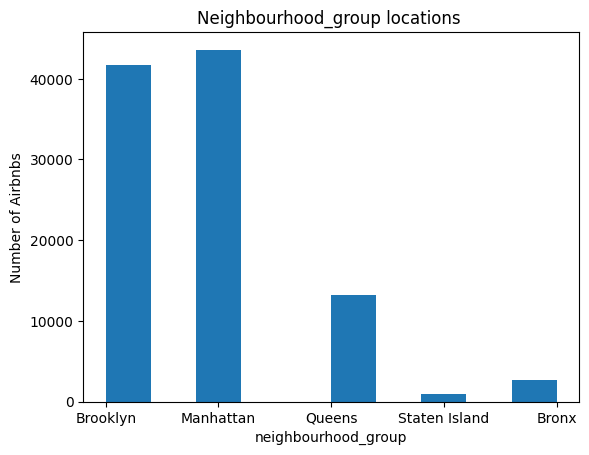

In [388]:
plt.hist(airbnb_df['neighbourhood_group'])
plt.xlabel('neighbourhood_group')
plt.ylabel('Number of Airbnbs')
plt.title('Neighbourhood_group locations ')


cerca correlazione tra neighboorod e price o con plot o con scatter e anche tra review_rate e price per vedere se all aumentare del numero di rece cambia wualcosa nel prezzo

In [389]:
#sns.pairplot(airbnb_df)

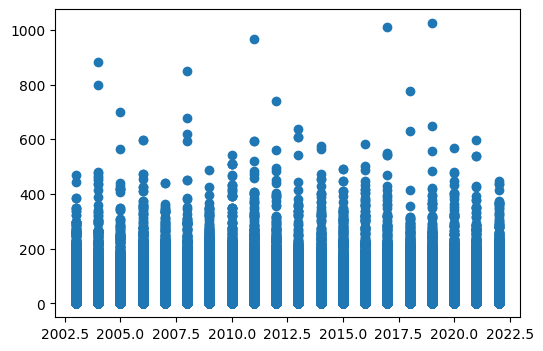

In [390]:
plt.figure(figsize=(6,4))
plt.scatter(airbnb_df["construction_year"], airbnb_df["number_of_reviews"])

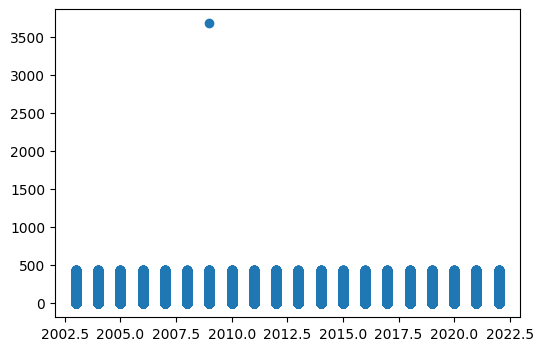

In [391]:
plt.figure(figsize=(6,4))
plt.scatter(airbnb_df["construction_year"], airbnb_df["availability_365"])

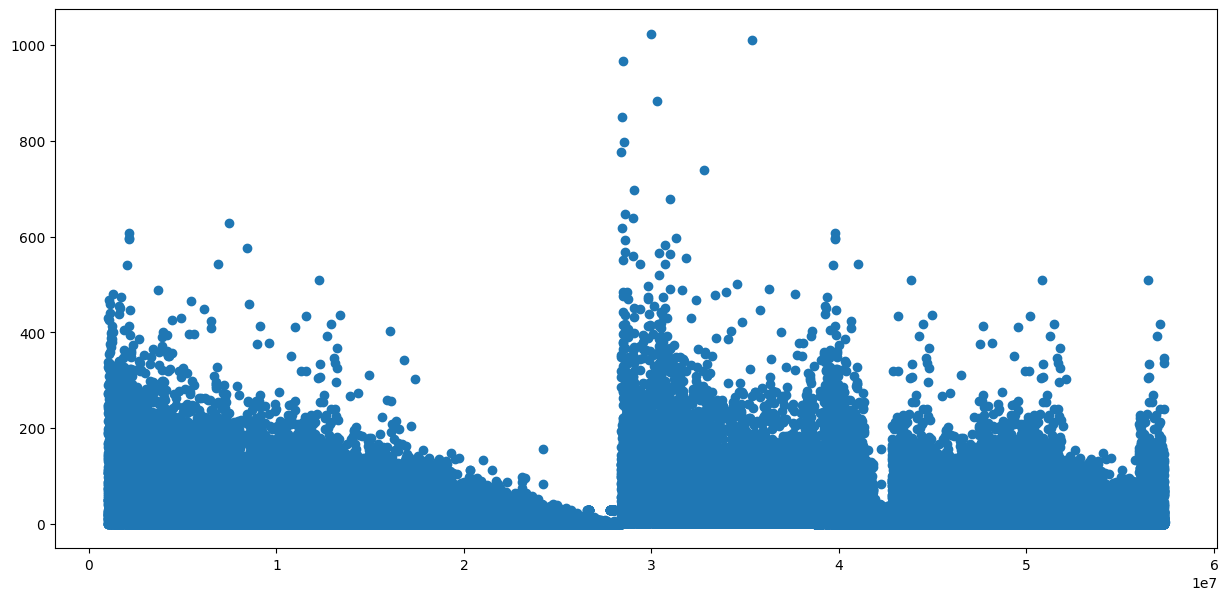

In [392]:
plt.figure(figsize=(15,7))
plt.scatter(airbnb_df["id"], airbnb_df["number_of_reviews"])

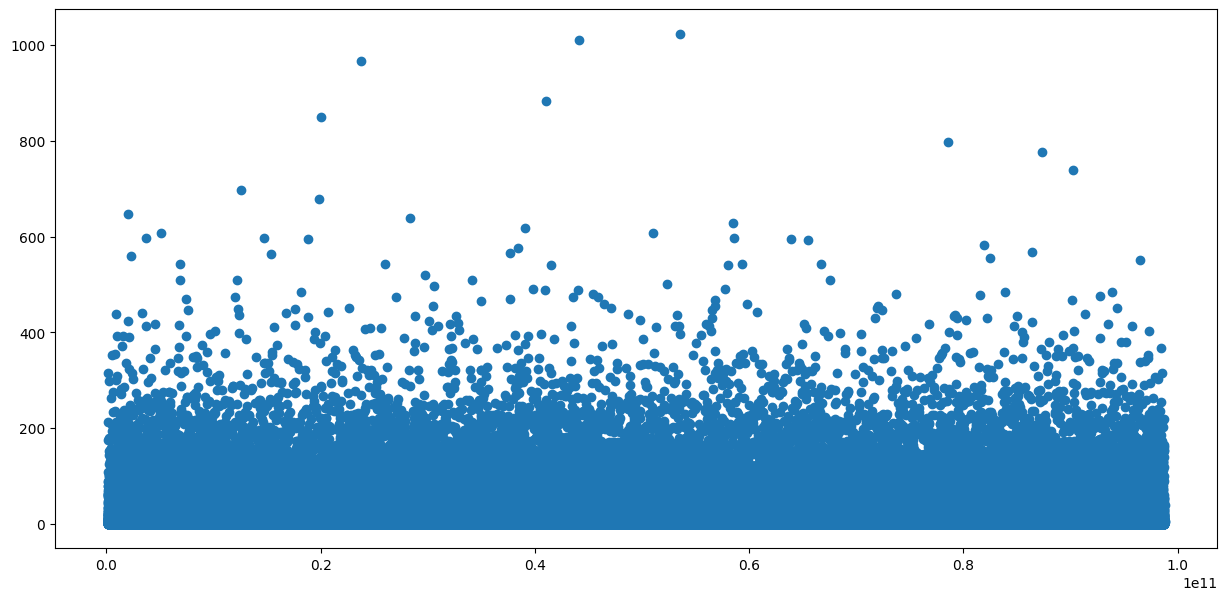

In [393]:
plt.figure(figsize=(15,7))
plt.scatter(airbnb_df["host_id"], airbnb_df["number_of_reviews"])

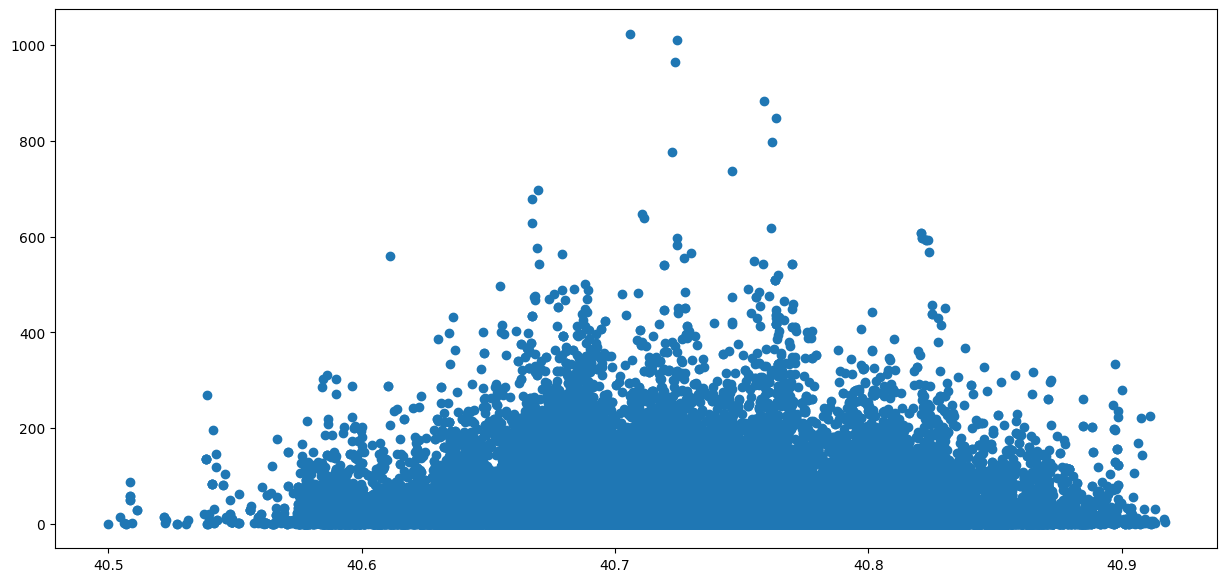

In [394]:
plt.figure(figsize=(15,7))
plt.scatter(airbnb_df["lat"], airbnb_df["number_of_reviews"])

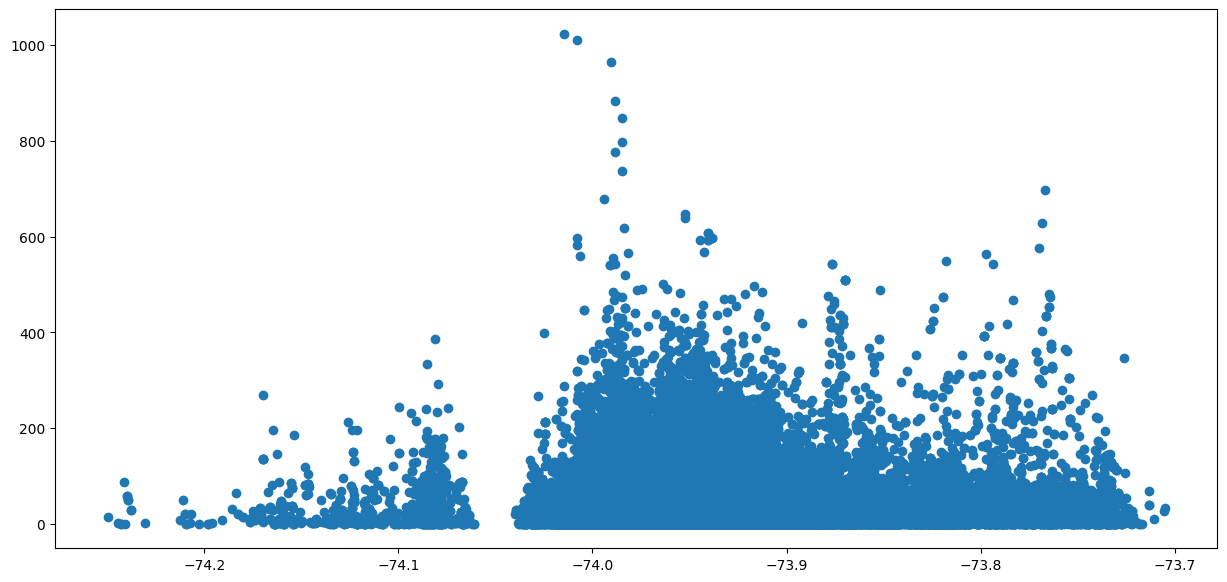

In [395]:
plt.figure(figsize=(15,7))
plt.scatter(airbnb_df["long"], airbnb_df["number_of_reviews"])

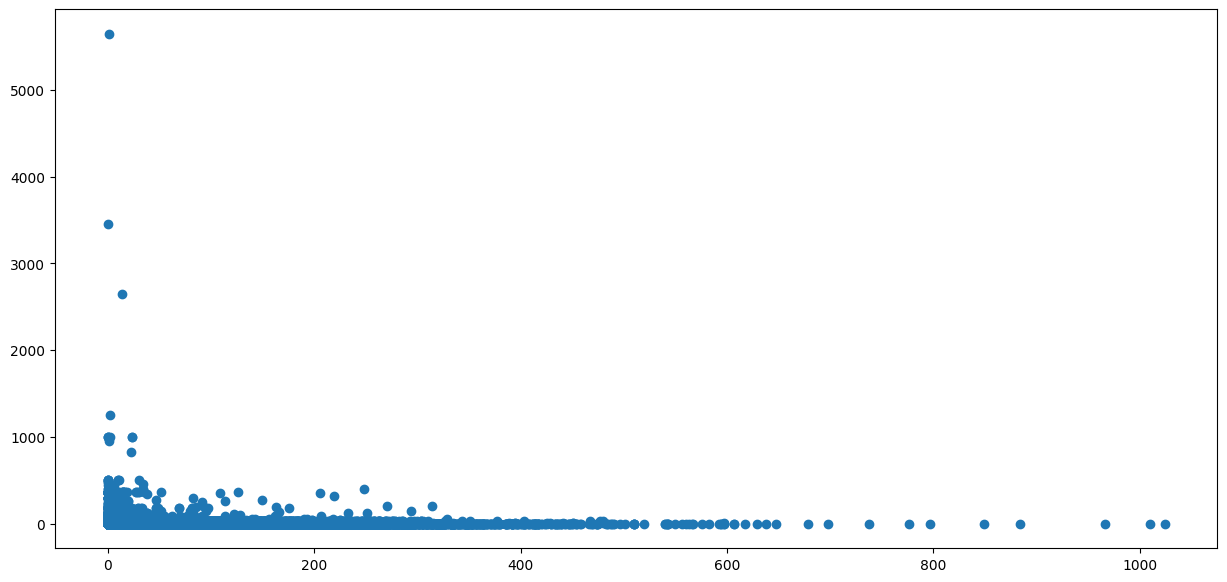

In [396]:
plt.figure(figsize=(15,7))
plt.scatter(airbnb_df["number_of_reviews"], airbnb_df["minimum_nights"])

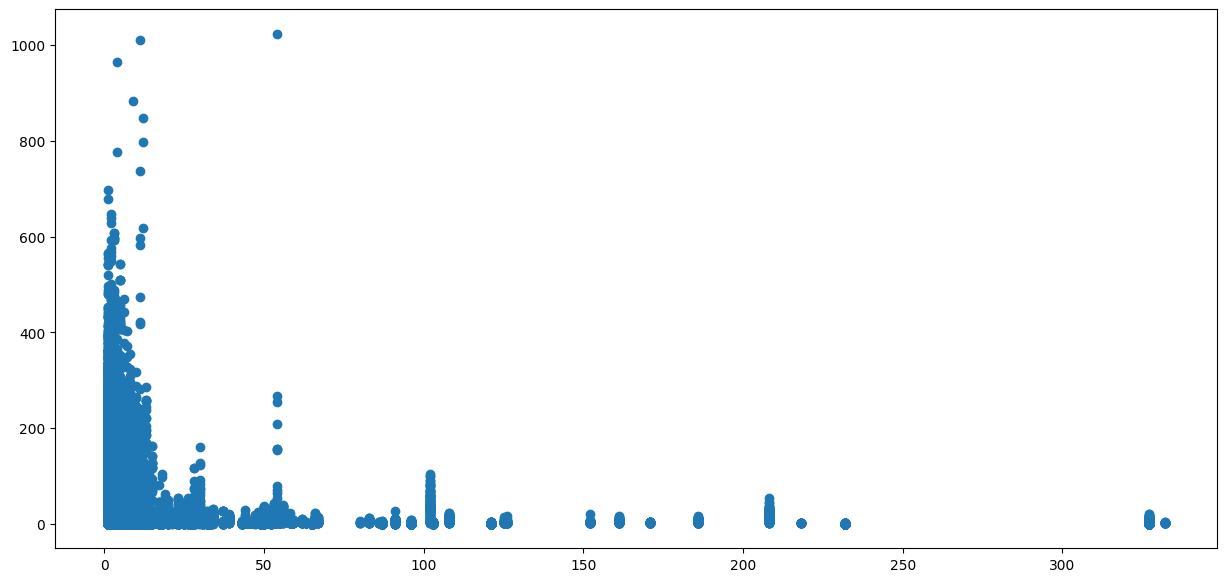

In [397]:
plt.figure(figsize=(15,7))
plt.scatter(airbnb_df["calculated_host_listings_count"], airbnb_df["number_of_reviews"])

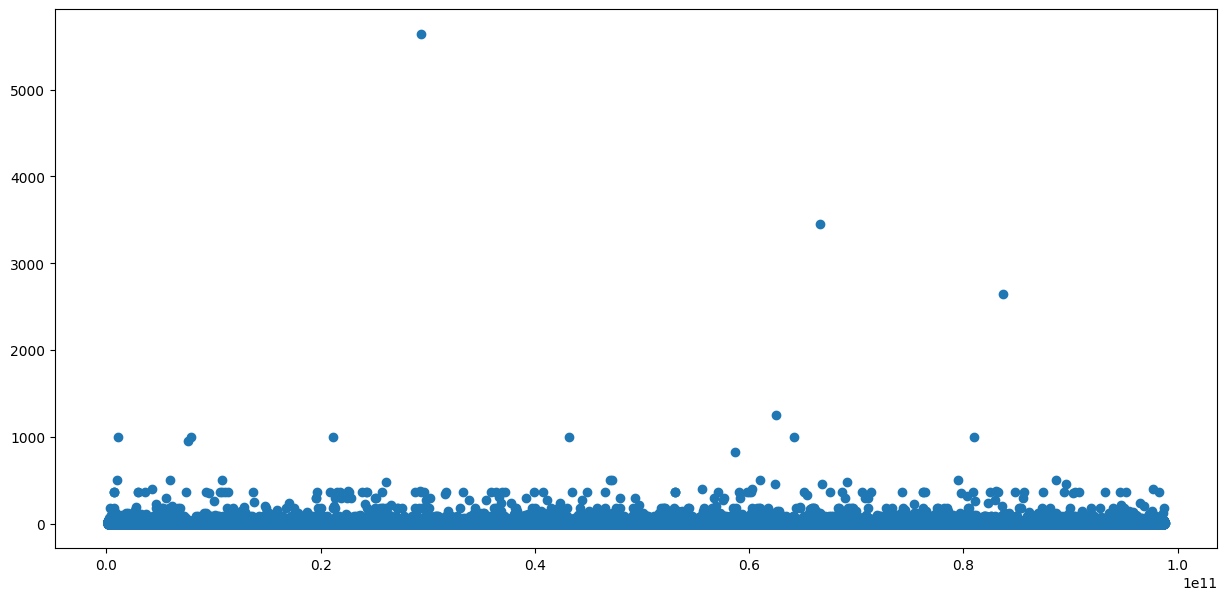

In [398]:
plt.figure(figsize=(15,7))
plt.scatter(airbnb_df["host_id"], airbnb_df["minimum_nights"])

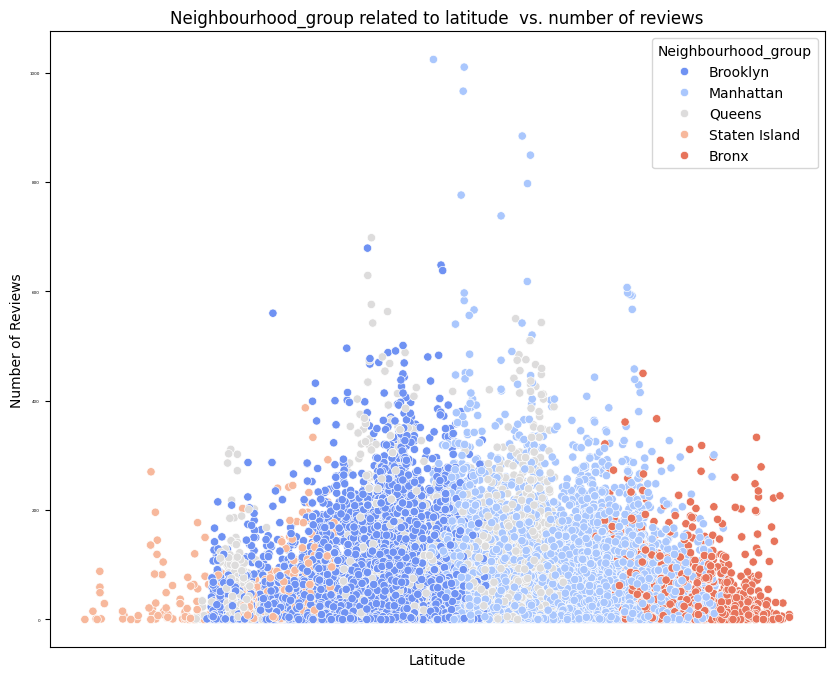

In [399]:
plt.figure(figsize=(10, 8))
plt.xlabel('Latitude')
plt.ylabel('Number of Reviews')
plt.title('Neighbourhood_group related to latitude  vs. number of reviews')
plt.xticks( fontsize=3)
plt.yticks( fontsize=3)
sns.scatterplot(data = airbnb_df, x = 'lat', y= 'number_of_reviews', hue='neighbourhood_group', palette='coolwarm')
plt.legend(title= 'Neighbourhood_group')
plt.xticks([])
plt.show()

vedo che la maggior parte degli appartamenti recensiti riguardano quelli di brooklyn e manhattan

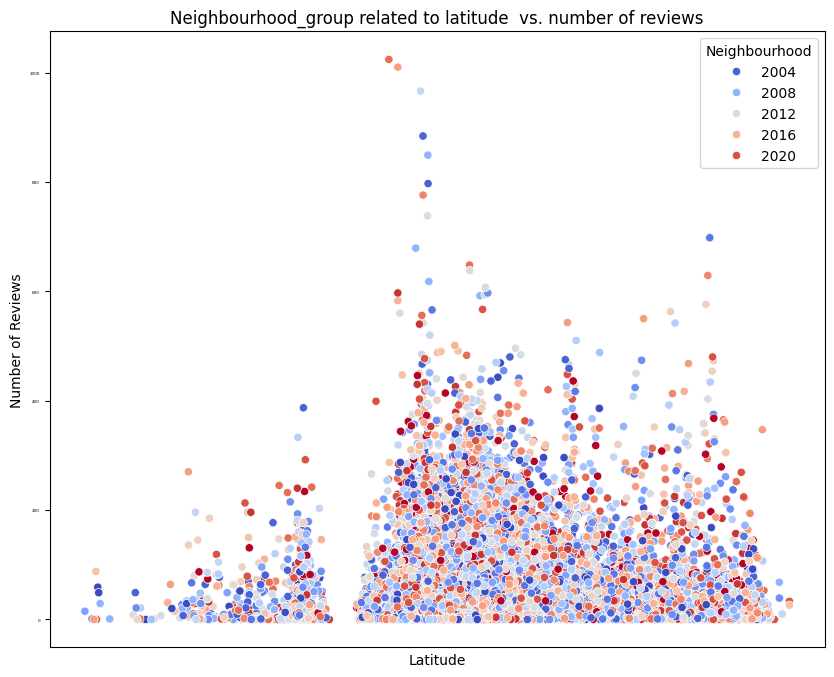

In [400]:
plt.figure(figsize=(10, 8))
plt.xlabel('Latitude')
plt.ylabel('Number of Reviews')
plt.title('Neighbourhood_group related to latitude  vs. number of reviews')
plt.xticks( fontsize=3)
plt.yticks( fontsize=3)
sns.scatterplot(data = airbnb_df, x = 'long', y= 'number_of_reviews', hue='construction_year', palette='coolwarm')
plt.legend(title= 'Neighbourhood')
plt.xticks([])
plt.show()

In [401]:
airbnb_df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,1001254,1002102,1002403,1002755,1003689,1004098,1004650,1005202,1005754,1006307,1006859,1007411,1007964,1008516,1009068
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Home away from home,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East,BlissArtsSpace!,BlissArtsSpace!,Large Furnished Room Near B'way,Cozy Clean Guest Room - Family Apt,Cute & Cozy Lower East Side 1 bdrm,Beautiful 1br on Upper West Side,Central Manhattan/near Broadway,"Lovely Room 1, Garden, Best Area, Legal rental",Wonderful Guest Bedroom in Manhattan for SINGLES
host_id,80014485718,52335172823,78829239556,85098326012,92037596077,45498551794,61300605564,90821839709,79384379533,75527839483,1280143094,18824631834,88136055909,26802410424,88920244552
host_identity_verified,unconfirmed,verified,unconfirmed,unconfirmed,verified,verified,unconfirmed,unconfirmed,verified,unconfirmed,verified,verified,verified,verified,verified
host_name,Madaline,Jenna,Elise,Garry,Lyndon,Michelle,Alberta,Emma,Evelyn,Carl,Miranda,Alan,Michael,Darcy,Leonardo
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Brooklyn,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill,Bedford-Stuyvesant,Bedford-Stuyvesant,Hell's Kitchen,Upper West Side,Chinatown,Upper West Side,Hell's Kitchen,South Slope,Upper West Side
lat,40.64749,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.68688,40.76489,40.80178,40.71344,40.80316,40.76076,40.66829,40.79826
long,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.95596,-73.98493,-73.96723,-73.99037,-73.96545,-73.98867,-73.98779,-73.96113
country,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States


voglio far diventare price e service fee dei float quindi voglio togliere $ e mettere ' '

In [402]:
airbnb_df.price

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 102113, dtype: float64

In [403]:
#dopo aver trasformato in float service fee e price posso vedere l'impatto del prezzo del servizio sul prezzo della camera di riferimento
#plt.scatter(airbnb_df['service_fee'], airbnb_df['price'])
#plt.show()

10 neighbourood con più airbnbs:

In [404]:
neighbourhood_by_most_Airbnbs = airbnb_df.neighbourhood.value_counts()
top_10_neighbourhood = neighbourhood_by_most_Airbnbs.head(10)
top_10_neighbourhood

neighbourhood
Bedford-Stuyvesant    7914
Williamsburg          7740
Harlem                5442
Bushwick              4953
Hell's Kitchen        3955
Upper West Side       3847
Upper East Side       3661
East Village          3467
Midtown               3372
Crown Heights         3244
Name: count, dtype: int64

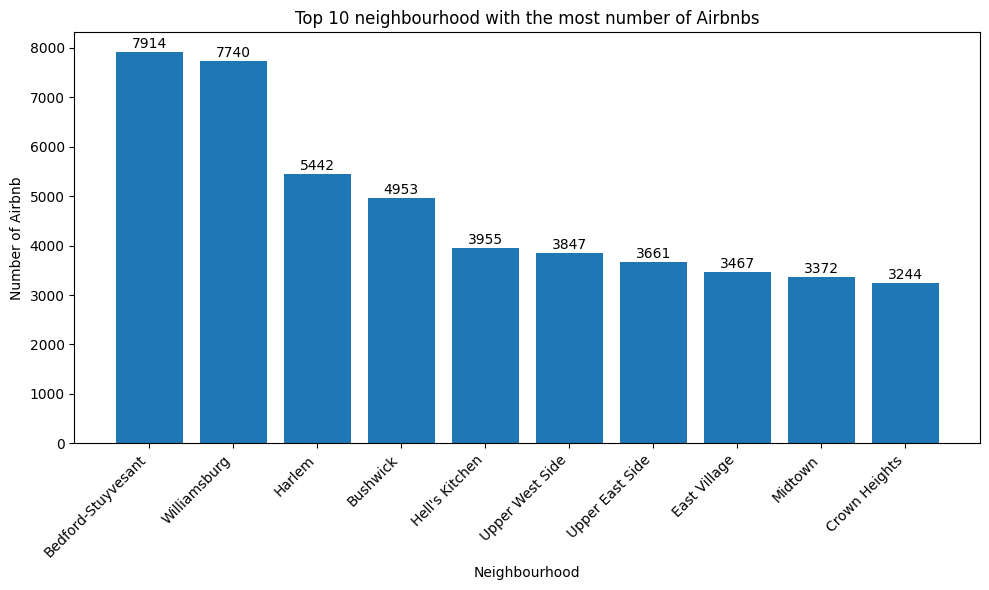

In [414]:

plt.figure(figsize=(10,6))
x = top_10_neighbourhood.index # Nomi degli assi dei quartieri
y = top_10_neighbourhood # Numero di quartieri
plt.title('Top 10 neighbourhood with the most number of Airbnbs')
plt.bar(x, y)
plt.xticks(rotation=45, ha='right') #with 'right' I'm sure that the xticks are under the corresponding bar
plt.ylabel('Number of Airbnb')
plt.xlabel('Neighbourhood')
for i, v in enumerate(y):#i index of y, v is the number of airbnbs in the neighbourhood of index i
    plt.text(i, v + 20, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()
